Importing TensorFlow and other necessary libraries


In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from tensorflow import keras

from keras.datasets import fashion_mnist     # fashion_mnist dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

ModuleNotFoundError: No module named 'keras.layers.core'

Load a dataset (fashion_mnist will be used in this project)

In [3]:
# The fashion_mnist data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Show and label some images from the dataset

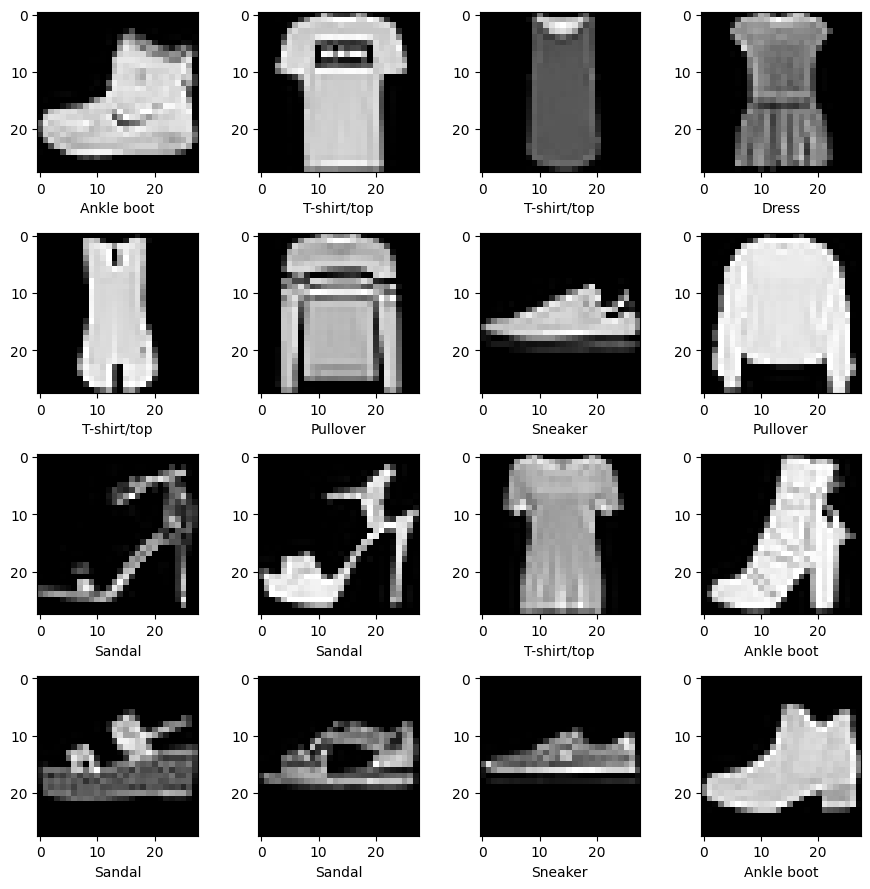

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(16):
    plt.subplot(4,4,i+1)
    num = random.randint(0, len(y_train))
    plt.imshow(X_train[i], cmap = 'gray', interpolation='none')
    plt.xlabel(class_names[y_train[i]])

plt.tight_layout()

Formating the data from 28x28 matrix to 784-length vector

In [5]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

NameError: name 'np_utils' is not defined

Build the model

In [7]:
model = Sequential()
#first layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
#dropout helps protect the model from memorizing the training data
model.add(Dropout(0.2))
#second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
#final layer
model.add(Dense(10))
model.add(Activation('softmax'))

NameError: name 'Dense' is not defined

In [ ]:
#put out a summary of the model
model.summary()

Compile and train the model

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#begin training
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

In [ ]:
#Test and evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)


In [ ]:
#show result
print(test_acc)